### Previous: <a href = "keras_03.ipynb">1.3 Output shape</a>

# <center> Keras </center>
## <center>1.4 Basic model of a network</center>

# Explanation

## Main parts of ML

1. Defining the model layers<br>

2. Setting the loss and optimizer function --> model.compile<br>

3. Training with specific batch_size and number of epochs --> model.fit


# Example

In [31]:
#previously done
from keras.datasets import mnist
from keras.utils import np_utils
%matplotlib inline
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG

#Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [32]:
def plot_training_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    #loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Number of epochs
One epoch consists of one full training cycle of the training set. <br>
After every sample in the training set has been seen, the next epoch starts.


In [33]:
NP_EPOCHS = 6

## Batch size
The batch size defines, after how many samples the algorithm is adjusted.

In [34]:
BATCH_SIZE = 1000

In [35]:
#Imports
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD, Adam, Adamax
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG


<img src="img/structure_layer.PNG" width="60%" />

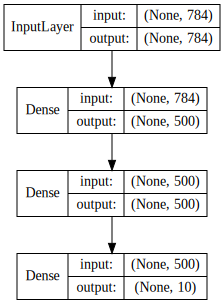

In [36]:
#1. Defining the model structure

model = Sequential()

# input layer
model.add(Dense(input_dim=28*28, units=500, activation='sigmoid'))

# hidden layer
model.add(Dense(units=500, activation='sigmoid'))

# output layer
model.add(Dense(units=10, activation='softmax'))


from graphviz import Digraph
import pydot, graphviz
SVG(model_to_dot(model,
                 show_shapes=True,
                 show_layer_names=False).create(prog='dot', format='svg'))

Note:<br>
Only the input layer needs definition of input_dimension. <br>
The layers below take the output_dimension of the layer above as input_dimension.

In [37]:
#2. Setting loss and optimizer function
model.compile(loss='mse',
              optimizer=SGD(lr=0.1),
              metrics=['accuracy'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 8s 129us/step - loss: 0.0915 - acc: 0.0871 - val_loss: 0.0906 - val_acc: 0.1024
Epoch 2/6
60000/60000 [==============================] - 7s 123us/step - loss: 0.0902 - acc: 0.1114 - val_loss: 0.0900 - val_acc: 0.1320
Epoch 3/6
60000/60000 [==============================] - 7s 122us/step - loss: 0.0899 - acc: 0.1397 - val_loss: 0.0899 - val_acc: 0.1182
Epoch 4/6
60000/60000 [==============================] - 7s 123us/step - loss: 0.0898 - acc: 0.1198 - val_loss: 0.0898 - val_acc: 0.1184
Epoch 5/6
60000/60000 [==============================] - 7s 124us/step - loss: 0.0898 - acc: 0.1214 - val_loss: 0.0898 - val_acc: 0.1242
Epoch 6/6
60000/60000 [==============================] - 7s 125us/step - loss: 0.0898 - acc: 0.1289 - val_loss: 0.0897 - val_acc: 0.1264


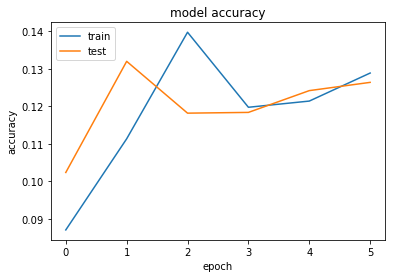

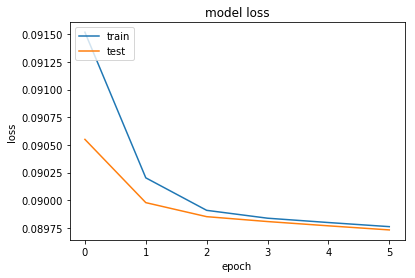

In [38]:
#3. Training with specified batch_size and number of epochs
BATCH_SIZE=1000
NP_EPOCHS=6
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NP_EPOCHS,
                    verbose=1, validation_data=(X_test, Y_test))
plot_training_history(history)

In the following notebooks we will use 10000 images for training.

# Feedback

### Next: <a href = "keras_05.ipynb">1.5 Overfitting vs generalization</a>